# 1) Importing Libraries

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt


# 2) Loading Dataset

In [7]:
iot_data = pd.read_csv('../input/environmental-sensor-data-132k/iot_telemetry_data.csv')
iot_data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [8]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [9]:
data = pd.read_csv('../input/environmental-sensor-data-132k/iot_telemetry_data.csv', engine='python')
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


# 3) Preprocessing of Data

In [10]:
iot_data['time_stamp'] = pd.to_datetime(iot_data['ts'], unit='s')
#since in the Time column, a date isn’t specified and hence Pandas will put Some date automatically in that case.
iot_data.drop(columns=['ts'], inplace=True) 
print(iot_data.head())

              device        co   humidity  light       lpg  motion     smoke  \
0  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   False  0.020411   
1  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   False  0.013275   
2  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   False  0.020475   
3  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   False  0.018628   
4  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   False  0.020448   

        temp                    time_stamp  
0  22.700000 2020-07-12 00:01:34.385974407  
1  19.700001 2020-07-12 00:01:34.735567570  
2  22.600000 2020-07-12 00:01:38.073572636  
3  27.000000 2020-07-12 00:01:39.589146137  
4  22.600000 2020-07-12 00:01:41.761234999  


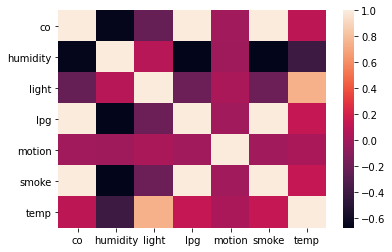

In [11]:
sns.heatmap(iot_data.corr()) 

In [12]:
df = pd.read_csv('/kaggle/input/environmental-sensor-data-132k/iot_telemetry_data.csv')

In [13]:
df.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True)
df['time_stamp'] = pd.to_datetime(df['ts'],unit='s')
df.drop(columns=['ts'], inplace=True)

df_1 = df[df.device == 1]
df_2 = df[df.device == 2]
df_3 = df[df.device == 3]

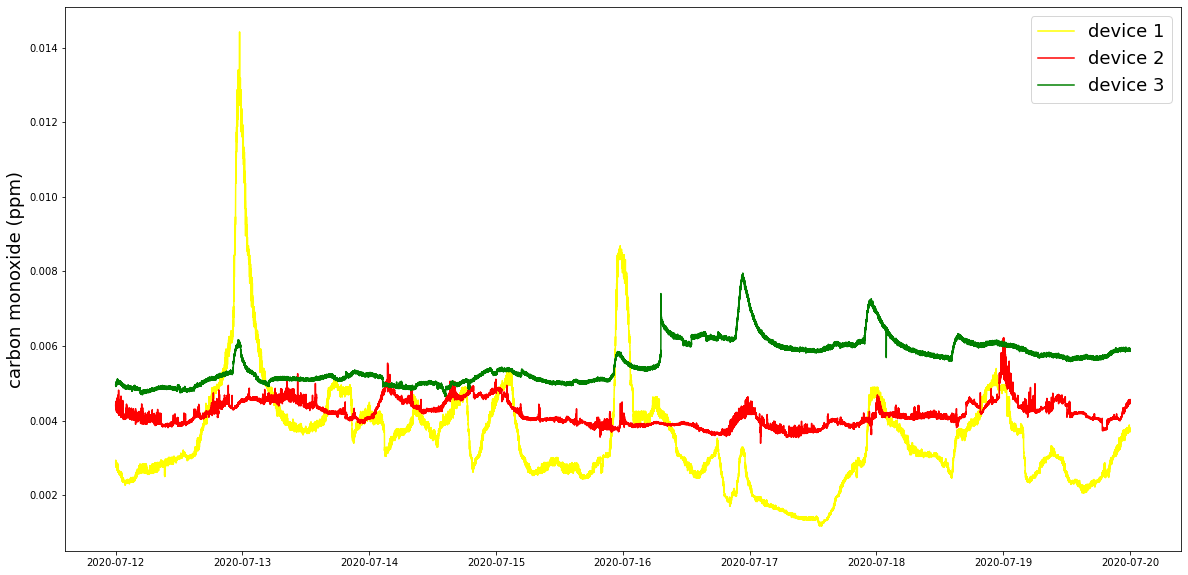

In [14]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.co, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.co, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.co, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('carbon monoxide (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

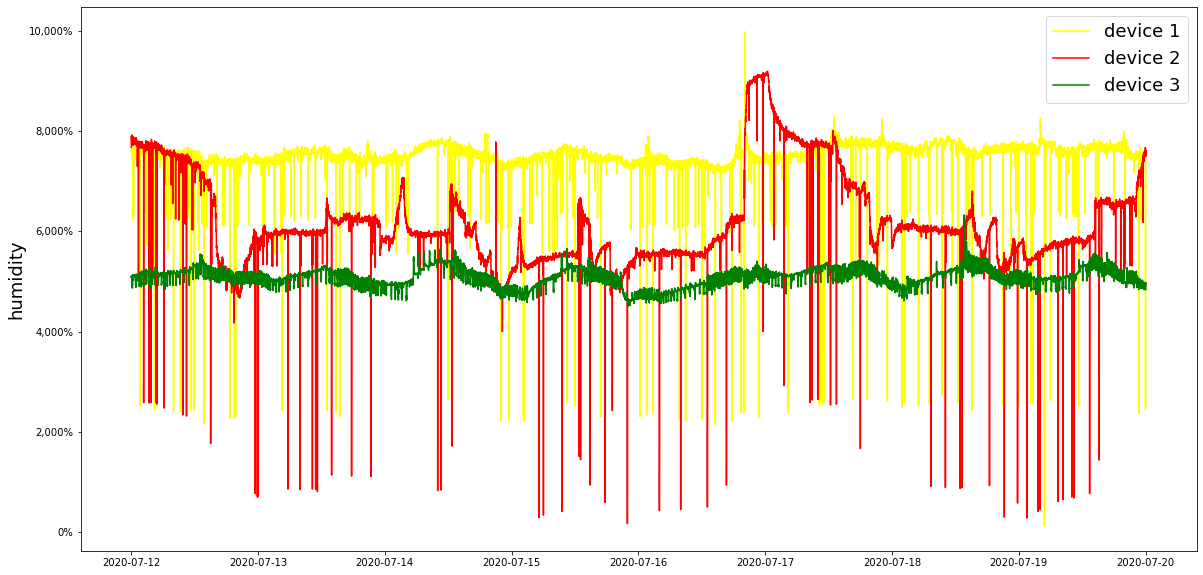

In [15]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.humidity, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.humidity, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.humidity, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('humidity', fontsize = 18)
plt.legend(fontsize = 18)
plt.xlabel('')
plt.show()



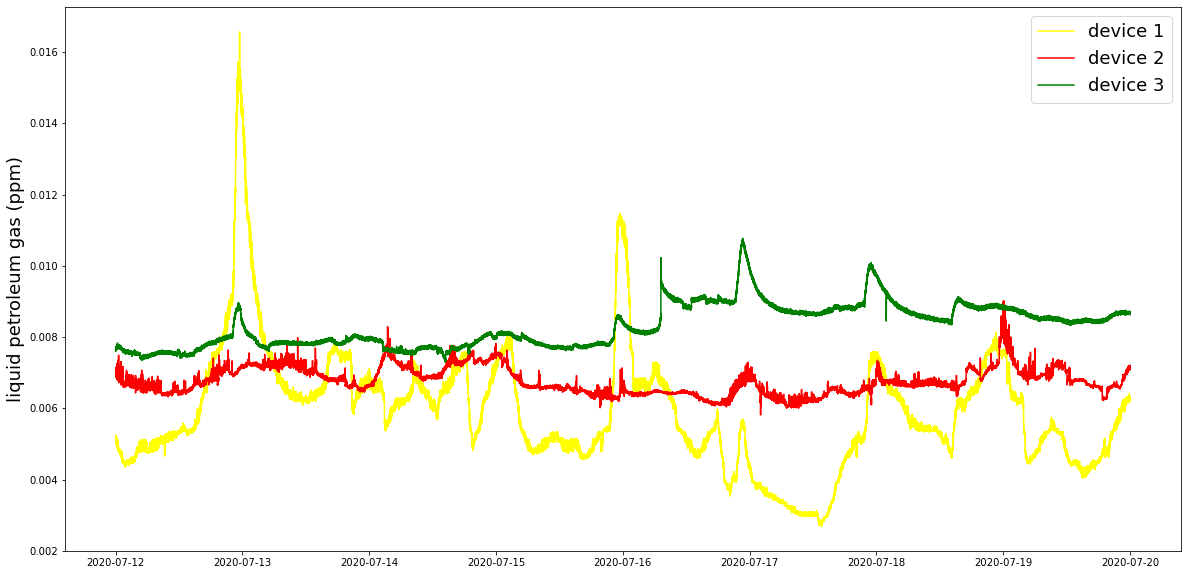

In [16]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.lpg, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.lpg, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.lpg, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('liquid petroleum gas (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()



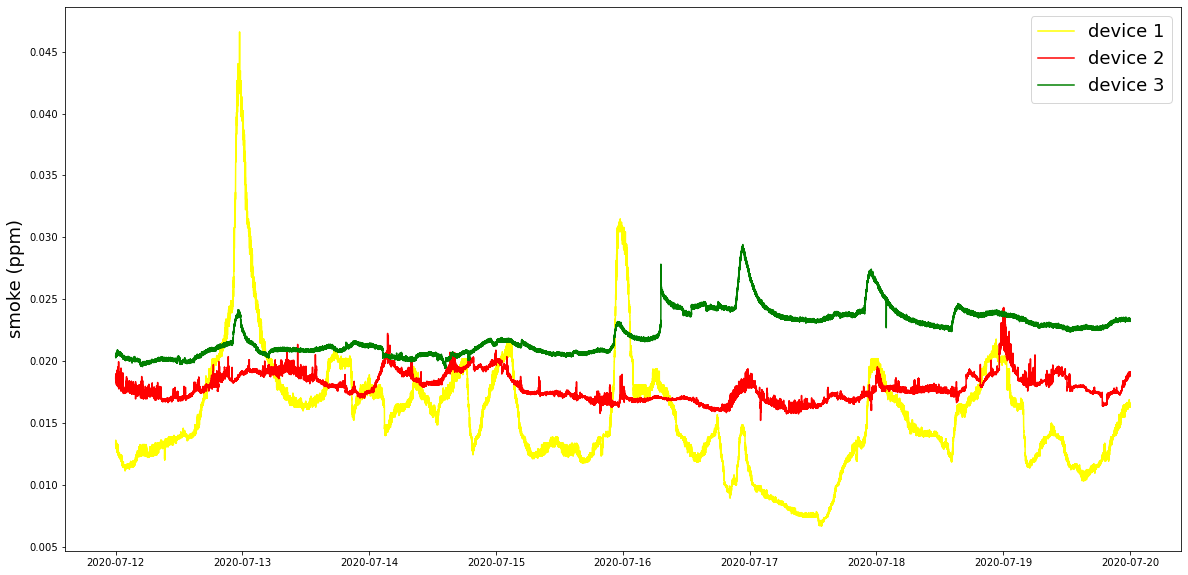

In [17]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(df_1.time_stamp, df_1.smoke, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.smoke, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.smoke, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('smoke (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

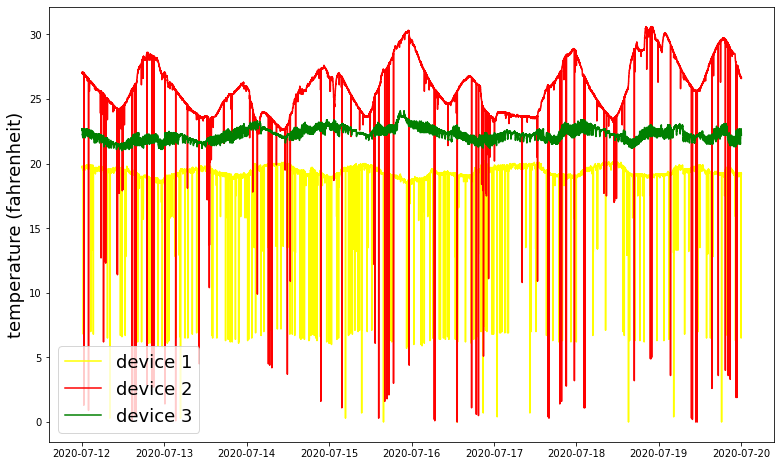

In [18]:
plt.figure(figsize=(13,8))
ax1 = sns.lineplot(df_1.time_stamp, df_1.temp, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.temp, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.temp, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('temperature (fahrenheit)', fontsize = 18)
plt.xlabel('')
plt.legend(fontsize = 18)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
Devices = labelencoder.fit_transform(iot_data['device'])
Light = labelencoder.fit_transform(iot_data['light'])
Motion = labelencoder.fit_transform(iot_data['motion'])

onehotencoder=OneHotEncoder()

In [20]:
iot_data['device'] = Devices
iot_data['light'] = Light
iot_data['motion'] = Motion
iot_data

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234999
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:33.162014961
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-07-20 00:03:33.576560736
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-07-20 00:03:36.167959213
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:36.979521513


In [21]:
iot_data_df = pd.DataFrame(iot_data)
iot_data_df.head()

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234999


In [22]:
iot_data_df.isnull().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

In [23]:
#converting the given temperature in  Fahrenheit to degree Celsius
iot_data_df['temp'] = (iot_data_df['temp'] * 1.8) + 32
iot_data_df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,2020-07-12 00:01:34.385974407
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,2020-07-12 00:01:34.735567570
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,2020-07-12 00:01:38.073572636
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2020-07-12 00:01:39.589146137
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,2020-07-12 00:01:41.761234999
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-07-20 00:03:33.162014961
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,71.960000,2020-07-20 00:03:33.576560736
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,79.880001,2020-07-20 00:03:36.167959213
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-07-20 00:03:36.979521513


# 4) Visualization

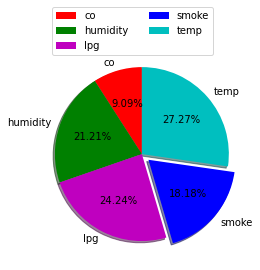

In [24]:
affect=['co', 'humidity', 'lpg', 'smoke', 'temp']
slice=[3,7,8,6,9]
color=['r', 'g', 'm', 'b', 'c']

plt.pie(slice, labels=affect, colors=color, startangle=90,shadow=True, 
       explode=(0,0,0,0.1,0), autopct='%1.2f%%')
plt.legend(bbox_to_anchor =(0.85, 1.20), ncol = 2) 
plt.show()

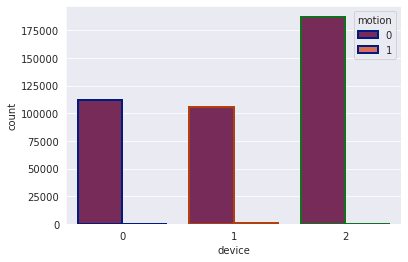

In [25]:
sns.set_style('darkgrid')
sns.countplot('device', hue='motion',palette="rocket", edgecolor=sns.color_palette("dark", 3),linewidth=2, data=iot_data_df)

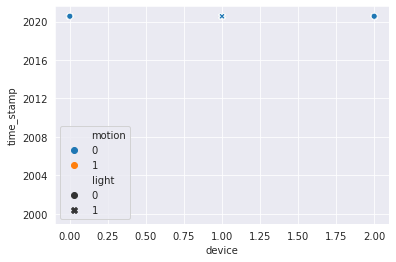

In [26]:
sns.scatterplot('device', 'time_stamp', hue= 'motion', style='light' , data=iot_data_df)

In [27]:
iot_data_df.drop('time_stamp', axis=1, inplace=True)
iot_data_df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000


# 5) Spliting Dataset into Train & Test

In [28]:
x = iot_data_df.drop('motion', axis= 1)
y = iot_data_df['motion'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
x

,device,co,humidity,light,lpg,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0.020411,72.860000
1,0,0.002840,76.000000,0,0.005114,0.013275,67.460001
2,2,0.004976,50.900000,0,0.007673,0.020475,72.680000
3,1,0.004403,76.800003,1,0.007023,0.018628,80.600000
4,2,0.004967,50.900000,0,0.007664,0.020448,72.680000
...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0.016437,66.560001
405180,2,0.005882,48.500000,0,0.008660,0.023301,71.960000
405181,1,0.004540,75.699997,1,0.007181,0.019076,79.880001
405182,0,0.003745,75.300003,0,0.006247,0.016437,66.560001


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

# 6) Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
prediction = reg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 15.0, 'Predicted label')

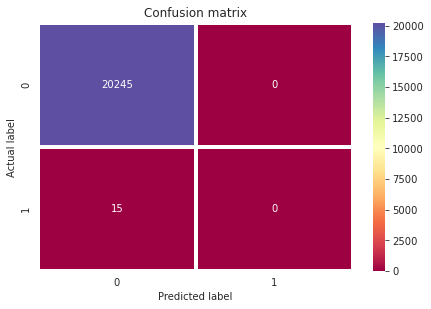

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
#cnf_matrix
sns.heatmap(cnf_matrix, annot=True, cmap="Spectral" ,fmt='g', linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

Accuracy: 0.9992596248766041
Precision: 0.0
Recall: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7) Modèle de Machine Learning Random Forest

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [36]:
X = iot_data_df.drop(['temp','device'], axis=1)  # Features
y = iot_data_df['temp']  # Target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
y_pred = rf.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 1.2615435094241836


In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix
sns.heatmap(cnf_matrix,annot=True,cmap="Spectral",fmt='g',linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: continuous is not supported

In [42]:
importances = rf.feature_importances_
feature_names = X.columns
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=False)
print(df_importances)


    Feature  Importance
2     light    0.578543
1  humidity    0.297287
5     smoke    0.046229
3       lpg    0.040720
0        co    0.037094
4    motion    0.000128


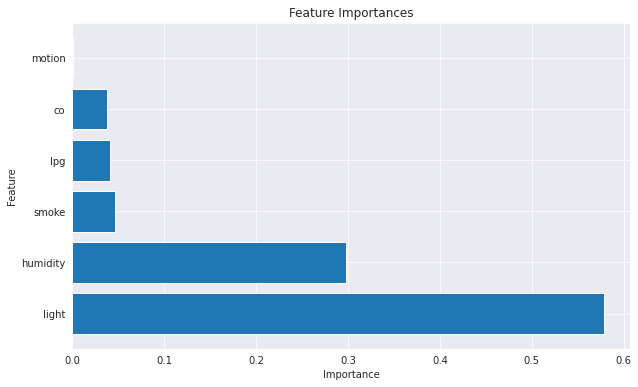

In [43]:
import matplotlib.pyplot as plt

# Extrait les caractéristiques importantes et les noms de caractéristiques
importances = rf.feature_importances_
feature_names = X.columns

# Trie les caractéristiques par ordre d'importance décroissante
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

sns.set_style('darkgrid')

# Crée un graphique à barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()



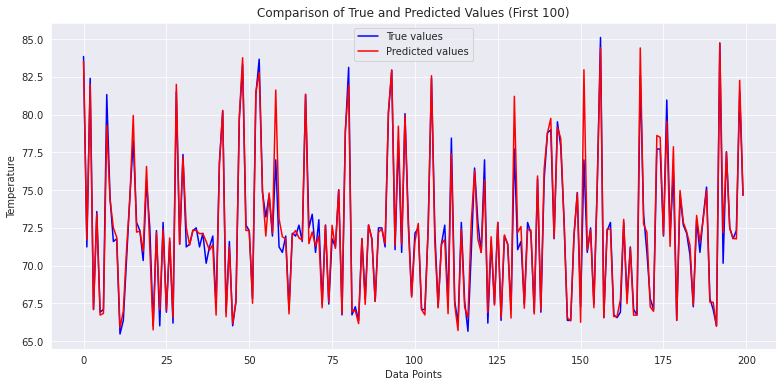

In [44]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles et prédites pour les 100 premières valeurs
print()
print()
plt.figure(figsize=(13, 6))
plt.plot(range(200), y_test[:200], color='b', label='True values')
plt.plot(range(200), y_pred[:200], color='r', label='Predicted values')

plt.title('Comparison of True and Predicted Values (First 100)')
plt.xlabel('Data Points')
plt.ylabel('Temperature')
plt.legend()
plt.show()


> # Since motion had only 482 values =True which is 0% value of the entire Dataset in the Motion column others are False (405k = 100%) , so the machine will not predict the right accuracy.
> 
> # Accuracy is approx 100% which means machine is overfitted.
> 
> # Precision = 0,  which means that the machine could not find relevant data  with true values.
> 
> # Recall = 0, means that all relavant data couldn't be retrieved by the search